In [4]:
import nltk
from nltk.corpus import twitter_samples
import numpy as np

In [5]:
#nltk.download('twitter_samples')
nltk.data.path #Checking where is the data

['/home/adbik/nltk_data',
 '/usr/nltk_data',
 '/usr/share/nltk_data',
 '/usr/lib/nltk_data',
 '/usr/share/nltk_data',
 '/usr/local/share/nltk_data',
 '/usr/lib/nltk_data',
 '/usr/local/lib/nltk_data']

In [6]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [7]:
print("The length of positive tweets are : ", len(positive_tweets))
print("The length of positive tweets are : ", len(negative_tweets))


The length of positive tweets are :  5000
The length of positive tweets are :  5000


In [8]:
random_tweet = np.random.randint(0, 5000)
print(random_tweet)

print(positive_tweets[random_tweet])
print(negative_tweets[random_tweet])

1373
Thank you @platform4prose :)
@ImJoanneT Ahh no what did you get done?? I hope you're okay :(


In [9]:
#Preprocessing the Tweets

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


In [47]:
 # We first remove hyperlinks, twitter marks and styles using regular expressions

def remove_unwanted(tweet):
    # Removing hashtags
    clean_tweet = re.sub(r'#','',tweet)

    #Removing hyperlinks
    clean_tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', clean_tweet)
    
    #Removing old style Retweet text "RT"
    clean_tweet = re.sub(r'^RT[\s]+','',clean_tweet)
    
    return clean_tweet


In [48]:

print(random_tweet)
print(positive_tweets[random_tweet])
removed_tweet = remove_unwanted(positive_tweets[random_tweet])
print(removed_tweet)


1373
Thank you @platform4prose :)
Thank you @platform4prose :)


In [49]:
# We then tokenize the string i.e. split the string into individual words

tokenizer = TweetTokenizer(preserve_case = False, strip_handles=True, reduce_len=True)

def tokenize_tweet(tweet):
    tokened_tweet = tokenizer.tokenize(tweet)
    return tokened_tweet


In [50]:
# We now remove stop words and punctuations

#nltk.download('stopwords')
#importing English stop words list from NLTK
stopwords_eng = stopwords.words('english')
punctuations = string.punctuation

def remove_stopwords_and_punctuations(tokened_tweets):
    clean_tokens = []

    for word in tokened_tweets:
        if(word not in stopwords_eng and word not in punctuations):
            clean_tokens.append(word)
    
    return clean_tokens

In [51]:
# We now do stemming, which means to convert a word into its general form i.e. simple present form

stemmer = PorterStemmer()

def get_stem(tweets_clean):
    tweets_stem = []
    
    for word in tweets_clean:
        stem_word = stemmer.stem(word)
        tweets_stem.append(stem_word)

    return tweets_stem



In [52]:
#Checking whether all the processes have worked

example_tweet = np.random.randint(0,500)
print("The raw tweet is: \n{}\n".format(positive_tweets[example_tweet]))
 
print("The tweet after removing hashtags and hyperlink is:\n{}\n ".format(remove_unwanted(positive_tweets[example_tweet])))

print("The tweet after tokenizing can be displayed as: \n{}\n".format(tokenize_tweet(remove_unwanted(positive_tweets[example_tweet]))))

print("The tokens after removing stopwords and punctuation is:\n {} \n".format(remove_stopwords_and_punctuations(tokenize_tweet(remove_unwanted(positive_tweets[example_tweet])))))

print("The tokens after stemming them is:\n{}\n".format(get_stem(remove_stopwords_and_punctuations(tokenize_tweet(remove_unwanted(positive_tweets[example_tweet]))))))

The raw tweet is: 
@OJBJ @holmesjsamuel surely this could be your warmup this morning ??? Coming on 15th to Bath :) xx

The tweet after removing hashtags and hyperlink is:
@OJBJ @holmesjsamuel surely this could be your warmup this morning ??? Coming on 15th to Bath :) xx
 
The tweet after tokenizing can be displayed as: 
['surely', 'this', 'could', 'be', 'your', 'warmup', 'this', 'morning', '?', '?', '?', 'coming', 'on', '15th', 'to', 'bath', ':)', 'xx']

The tokens after removing stopwords and punctuation is:
 ['surely', 'could', 'warmup', 'morning', 'coming', '15th', 'bath', ':)', 'xx'] 

The tokens after stemming them is:
['sure', 'could', 'warmup', 'morn', 'come', '15th', 'bath', ':)', 'xx']



In [54]:
# Since all of these seem to work, we will now apply a combined function of all of there preprocessing techniques to the tweets

def combined_preprocessing(tweet):
    hashtags_and_links_removed = remove_unwanted(tweet)
    tokenized = tokenize_tweet(hashtags_and_links_removed)
    stopwords_and_punc_removed = remove_stopwords_and_punctuations(tokenized)
    stemmed_tokens = get_stem(stopwords_and_punc_removed)

    return stemmed_tokens

In [55]:
ex_tweet = np.random.randint(1,5000)
print(positive_tweets[ex_tweet])
print(combined_preprocessing(positive_tweets[ex_tweet]))

@StepintolifeYvl Amazing news! Enjoy your toy :)
['amaz', 'news', 'enjoy', 'toy', ':)']


In [56]:
#Splitting Data into Training and Testing Sets

train_positive = positive_tweets[:4000]
train_negative = negative_tweets[:4000]
test_positive = positive_tweets[4000:]
test_negative = negative_tweets[4000:]

train_x = train_positive + train_negative
test_x = test_positive + test_negative

train_y = np.append(np.ones(len(train_positive)), np.zeros(len(train_negative)))
test_y = np.append(np.ones(len(test_positive)), np.zeros(len(test_negative)))
#print(train_y.shape)
#print(test_y.shape)




In [57]:
#Creating a frequency dictionary

def create_freq_dict(tweets, y_values):
    freq_dictionary = {}

    for tweet, y in zip(tweets, y_values):
        for word in combined_preprocessing(tweet):
            pair = (word,y)
            if pair in freq_dictionary:
                freq_dictionary[pair] +=1
            else:
                freq_dictionary[pair] = 1
    
    return freq_dictionary

In [58]:
#Testing the frequency dictionary

tweets = ['This is good','I am sad',"the post is a banger",'That disappointing','what a good day']
y_values = [1,0,1,0,1]

freq_d = create_freq_dict(tweets,y_values)
print(freq_d)

#Works !

{('good', 1): 2, ('sad', 0): 1, ('post', 1): 1, ('banger', 1): 1, ('disappoint', 0): 1, ('day', 1): 1}


In [59]:
#Creating the frequency dictionary

freq_dict = create_freq_dict(train_x,train_y)
sorted_freq_dict = {k:v for k,v in sorted(freq_dict.items(),key = lambda item: item[1], reverse = True)}
print(sorted_freq_dict) 

{(':(', np.float64(0.0)): 3663, (':)', np.float64(1.0)): 2847, (':-)', np.float64(1.0)): 543, ('thank', np.float64(1.0)): 504, (':d', np.float64(1.0)): 498, (':-(', np.float64(0.0)): 378, ('love', np.float64(1.0)): 336, ('follow', np.float64(1.0)): 319, ('...', np.float64(0.0)): 282, ("i'm", np.float64(0.0)): 266, ('follow', np.float64(0.0)): 245, ('pleas', np.float64(0.0)): 243, ('miss', np.float64(0.0)): 239, ('...', np.float64(1.0)): 227, ('♛', np.float64(0.0)): 210, ('》', np.float64(0.0)): 210, ('good', np.float64(1.0)): 191, ('day', np.float64(1.0)): 187, ('like', np.float64(1.0)): 187, ('want', np.float64(0.0)): 185, ('like', np.float64(0.0)): 182, ('go', np.float64(0.0)): 181, ('get', np.float64(0.0)): 181, ('get', np.float64(1.0)): 164, ('happi', np.float64(1.0)): 161, ('see', np.float64(1.0)): 156, ('hi', np.float64(1.0)): 154, ('u', np.float64(0.0)): 151, ("can't", np.float64(0.0)): 148, ("i'm", np.float64(1.0)): 140, ('u', np.float64(1.0)): 136, ('great', np.float64(1.0)): 1

<h2> Training the Naive Bayes Model <h2>
<h3> Input <h3>
freq_dict : frequency dictionary where (word, label) tuple is a key to the total number of times the word appears in the dataset
train_x : the 'x' value of training data i.e. list of tweets

train_y : the 'y' value of training data i.e. labels to the tweets
<h3>Output<h3>
logprior:
 
log_likelihood:

In [60]:
#Training the naive bayes algorithm'''

def train_naive_bayes(freq_dict, train_x, train_y):
    loglikelihood = {}
    logprior = 0

    #Calculating the number of unique words in a vocab
    unique_words = set([pair[0] for pair in freq_dict.keys()])
    V = len(unique_words) # Here 'V' is the total number of unique words in the positive and negative tweets (not-repeated)


    #calculating N_pos and N_neg
    N_pos = 0 #N_pos is the total number of words in positive tweets 
    N_neg = 0 #N_neg is the total number of words in negative tweets

    for pair in freq_dict.keys():
        if pair[1] > 0:
            N_pos += freq_dict[pair] 
        else:
            N_neg += freq_dict[pair] #possible error
     
    #Calculating the total number of tweets
    D = train_y.shape[0]
    #Calculating the toal number of positive tweets
    D_pos = sum(train_y)
    #Calculating the total number of negative tweets
    D_neg = D - D_pos

    #We now find the log-prior
    logprior = np.log(D_pos) - np.log(D_neg) # This is called log odds ratio (or log prior ratio)

    #for each unique word
    for word in unique_words:
        freq_pos = freq_dict.get((word,1),0)
        freq_neg = freq_dict.get((word,0),0)
        
        #Calculating the probability that word is positive and negative

        prob_postive = (freq_pos+1) / (N_pos + V)
        prob_negative = (freq_neg+1) / (N_neg + V )

        #Calculating the log likeihood of the word
        loglikelihood[word] = np.log(prob_postive) - np.log(prob_negative)

    return logprior, loglikelihood


In [61]:
#Testing

D = train_y.shape[0]
D_pos = sum(train_y)
D_neg = D - D_pos
logprior = np.log(D_pos) - np.log(D_neg)
print(logprior)

0.0


In [108]:
#Predicting the tweets

def predict(tweet, logprior, loglikelihood):
    processed_word_list = combined_preprocessing(tweet)
    p = 0 #Initializing the probability to zero
    p += logprior

    for word in processed_word_list:
        if word in loglikelihood:
            p+= loglikelihood[word]

    if p>0:
        p = 1.0
    else:
        p = 0.0

    return p

In [109]:
#Testing the predict function with random tweets from twitter

loglikelihood = train_naive_bayes(freq_dict,train_x, train_y)[1]

for tweet in ['Politicians are jerks whether new or old',
              'I had no idea sitting together and laughing at random stuff with my parents & siblings would become a luxury after a certain point in life',
              'Feeling sad for #Bangabandhu Sheikh Mujibur Rahman. Protesters vandalizing his memorials :( .. A nation that doesn\'t remember it\'s founding fathers, never has a bright future. This is him in London requesting support for their citizens!!',
              'While reading the news, it seems there is chaos everywhere. The interesting thing is that even with this chaos, we are enjoying a bull market. #NEPSE 😂😂😂',
              'Post 12 o\' clock is when shit really starts to hit. This is why I HAVE to sleep early.',
              'Utter disgrace! Shameful and disgusting!',
              'pretty sunrise 10/10, the sky has been doing the most these days ✨',
              'I\'m so hungry and I dont have access to any food :)',
              'so tired',
              'I really do not understand why beer is so popular, it tastes like puke and doesn\'t even get you drunk what is the purpose if you want sth to drink while you hangout just drink cocacola atleast that doesn\'t taste like torture']:
    p = predict(tweet, logprior,loglikelihood)
    print(f'{tweet}--> {p:.2f}') 



Politicians are jerks whether new or old--> 1.00
I had no idea sitting together and laughing at random stuff with my parents & siblings would become a luxury after a certain point in life--> 1.00
Feeling sad for #Bangabandhu Sheikh Mujibur Rahman. Protesters vandalizing his memorials :( .. A nation that doesn't remember it's founding fathers, never has a bright future. This is him in London requesting support for their citizens!!--> 0.00
While reading the news, it seems there is chaos everywhere. The interesting thing is that even with this chaos, we are enjoying a bull market. #NEPSE 😂😂😂--> 1.00
Post 12 o' clock is when shit really starts to hit. This is why I HAVE to sleep early.--> 0.00
Utter disgrace! Shameful and disgusting!--> 0.00
pretty sunrise 10/10, the sky has been doing the most these days ✨--> 1.00
I'm so hungry and I dont have access to any food :)--> 1.00
so tired--> 0.00
I really do not understand why beer is so popular, it tastes like puke and doesn't even get you drun

In [82]:
#!pip install scikit-learn

In [118]:
#Testing and Evaluating
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix


In [115]:
y_pred = np.zeros(len(test_y))

for index, tweet in enumerate(test_x):
    predicted_y = predict(tweet, logprior, loglikelihood)
    y_pred[index] = predicted_y



In [ ]:
#Cross Check
#print(y_pred[1002])
#print(predict(test_x[1002], logprior,loglikelihood))

In [116]:
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y,y_pred,average = 'binary')
recall = recall_score(test_y,y_pred,average = 'binary')

In [117]:
print(f"The accuracy of the model is --> {accuracy}")
print(f"The precision of the model is: --> {precision}")
print(f"The recall score of the model is: --> {recall}")

The accuracy of the model is --> 0.994
The precision of the model is: --> 0.9959839357429718
The recall score of the model is: --> 0.992


In [121]:
from matplotlib import pyplot as plt
import seaborn as sns

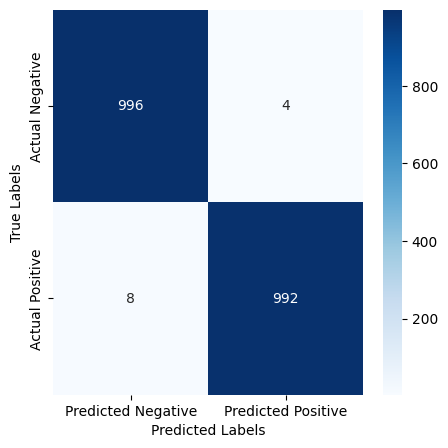

In [127]:
#Creating a confusion matrix

cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot= True, fmt = 'd', cmap ='Blues',xticklabels=['Predicted Negative','Predicted Positive'], yticklabels=['Actual Negative','Actual Positive'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [135]:
#Cross Checking Evaluation Metrics through the Confusion Matrix

calculated_accuracy = (cm[0][0]+ cm[1][1]) / (len(test_y))
print(f'The calculated accuracy is --> {calculated_accuracy}')

calculated_precision = ((cm[1][1]) / (cm[1][1] + cm[0][1] ))
print(f'The calculated precision is --> {calculated_precision}')

calculated_recall = (cm[1][1]/(cm[1][1]+cm[1][0]))
print(f'The calculated recall is --> {calculated_recall}')

The calculated accuracy is --> 0.994
The calculated precision is --> 0.9959839357429718
The calculated recall is --> 0.992
